<a href="https://colab.research.google.com/github/abaskasa/AbasKasa/blob/main/Tiran_PrettyMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/abey79/vsketch#egg=vsketch
!pip install git+https://github.com/marceloprates/prettymaps.git

!mkdir ../prints
!mkdir ../assets
!mkdir ../assets/Permanent_Marker/
!wget -O ../assets/Permanent_Marker/PermanentMarker-Regular.ttf https://github.com/marceloprates/prettymaps/raw/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/abey79/vsketch to /tmp/pip-install-rlvjk7qj/vsketch_1aabca69775f45d298a668429c878e3d
  Running command git clone -q https://github.com/abey79/vsketch /tmp/pip-install-rlvjk7qj/vsketch_1aabca69775f45d298a668429c878e3d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/abey79/vpype (to revision 6a099b7b4f3d756f7fa8052049be365d0314c5ee) to /tmp/pip-install-rlvjk7qj/vpype_aefdc363cdb94f11b7100db6d1093be6
  Running command git clone -q https://github.com/abey79/vpype /tmp/pip-install-rlvjk7qj/vpype_aefdc363cdb94f11b7100db6d1093be6
  Running command git rev-parse -q --verify 'sha^6a099b7b4f3d756f7fa8052049be365d0314c5ee'
  Running command git fetch -q https://github.com/abey79/vpype 6a099b7b4f3d756f7fa8052049be365d0314c5ee
  Running command git checkout -q 6a099b7

--2022-07-23 10:05:21--  https://github.com/marceloprates/prettymaps/raw/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marceloprates/prettymaps/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf [following]
--2022-07-23 10:05:22--  https://raw.githubusercontent.com/marceloprates/prettymaps/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73620 (72K) [application/octet-stream]
Saving to: ‘../assets/Permanent_Marker/PermanentMarker-Regular.ttf’

../assets/Permanent 100%[========

In [2]:
# For local execution (does not require installing the library):
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

# Prettymaps
from prettymaps import *
# Vsketch
try: 
  import vsketch
except:
  print("Vsketch import failed")
# OSMNX
import osmnx as ox
# Matplotlib-related
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from descartes import PolygonPatch
# Shapely
from shapely.geometry import *
from shapely.affinity import *
from shapely.ops import unary_union

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Vsketch import failed


/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:318: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated a

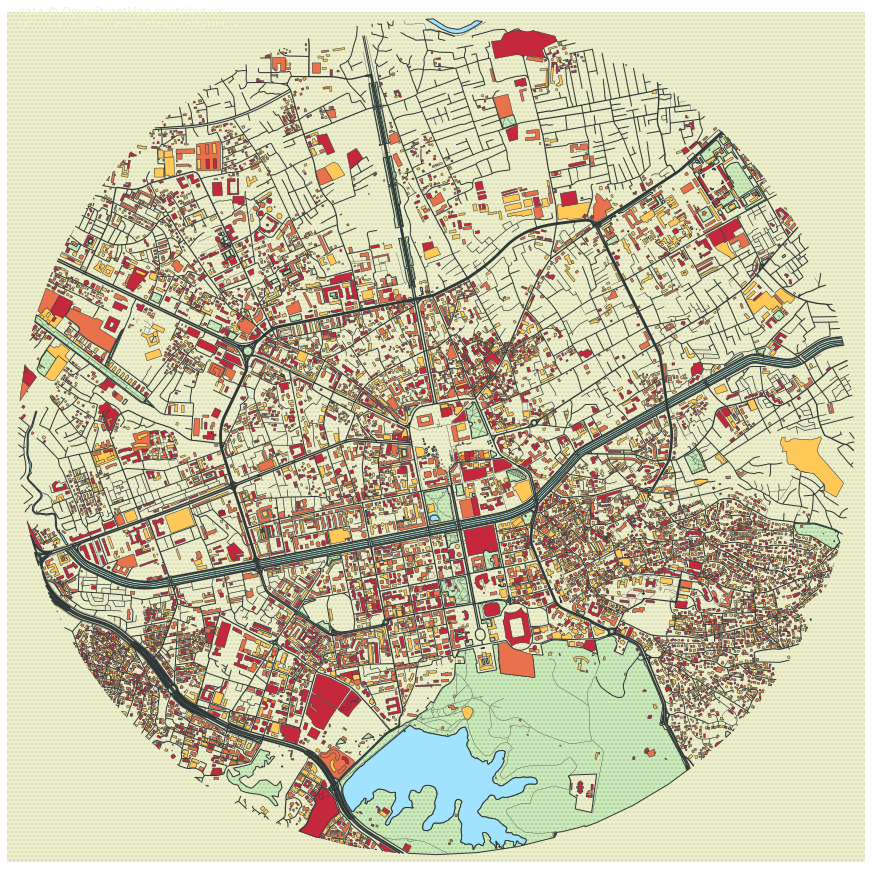

In [5]:
palette = ['#FFC857', '#E9724C', '#C5283D']

fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

layers = plot(
    'Skanderbeg Square, Njësia Bashkiake Nr. 10, Tiranë, Tirana Municipality, Tirana County, Central Albania, Albania', radius = 2500,
    
    ax = ax,
    
    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'living_street': 2,
                    'pedestrian': 1,
                    'footway': 1,
                    'track': 1,
                    'bridleway': 1
                }
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'scrub': {'tags': {'natural': 'scrub'}},
            'walls': {'tags': {'manmade': 'embankment'}},
        },
        drawing_kwargs = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'hatch_c': '#b3cfa5', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'scrub': {'fc': '#89d689', 'ec': '#2F3737', 'hatch_c': '#75bd75', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'walls': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        },

        osm_credit = {'color': '#F2F4CB'}
)

#plt.savefig('../prints/erbil.png')
#plt.savefig('../prints/erbil.svg')

In [6]:
plt.savefig('C:/Users/AbasKasa/Desktop/Tirana.png')

FileNotFoundError: ignored

<Figure size 432x288 with 0 Axes>